# Correlation: dB vs CO2

In [1]:
#Packages import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os

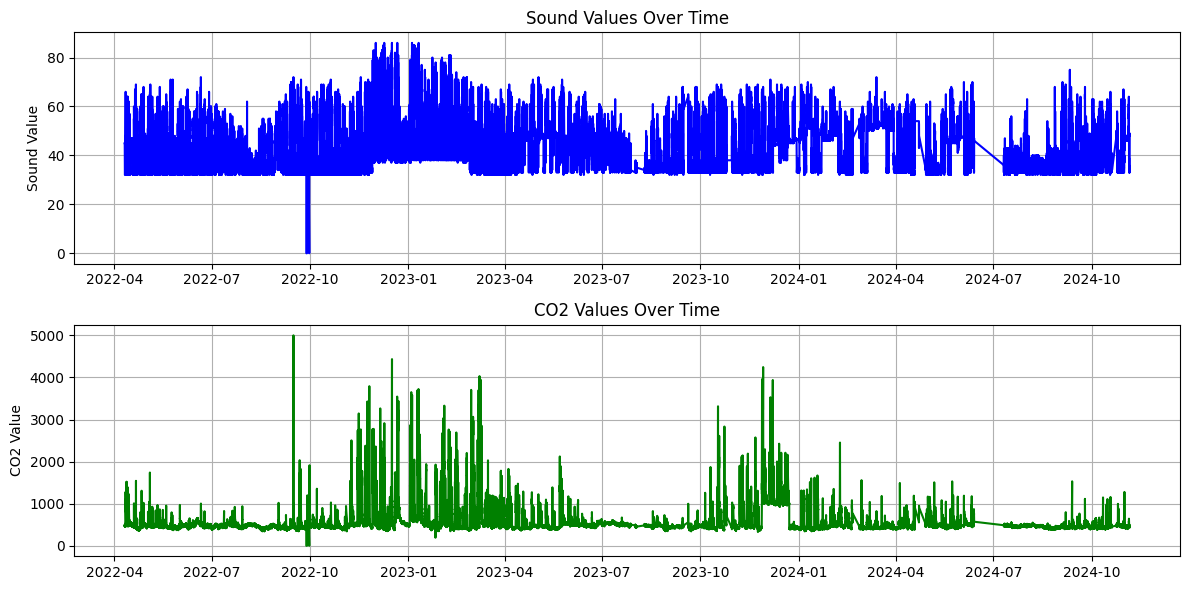

In [2]:
# Load the dataset
file_path = r'S:\OneDrive - Fondation EPF\Uni\5eme Année\Project(Σ.humans)\Coding\sum_humans\Data_Extraction and analysis\Data Extraction\raw_sensor_data.csv'
data = pd.read_csv(file_path)

# Convert 'time' column to datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Step 1: Plot sound_value and co2_value over time
plt.figure(figsize=(12, 6))

# Sound values over time
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['sound_value'], color='b', label='Sound Value')
plt.title('Sound Values Over Time')
plt.ylabel('Sound Value')
plt.grid(True)

# CO2 values over time
plt.subplot(2, 1, 2)
plt.plot(data['time'], data['co2_value'], color='g', label='CO2 Value')
plt.title('CO2 Values Over Time')
plt.ylabel('CO2 Value')
plt.grid(True)

plt.tight_layout()
plt.show()




Small Data set analysis: 
After #2024-06-12 22:32:34, no more data was collected for this month.(May be servers were sut down)

From 2022/09/27 to 2022/09/28, all the values for the sensors, read 0. This can be an error as co2 cannot usually be 0, rather than having jsut a low value.




In [3]:
## Data Cleaning

output_folder = "Cleaned_sound_db"

# Create the folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Remove rows where both sound_value and co2_value are 0
cleaned_data = data[(data['sound_value'] != 0) | (data['co2_value'] != 0)]

# Check if the cleaning was successful
print(cleaned_data.head())

# Optionally, save the cleaned data to a new CSV file
cleaned_data.to_csv('Cleaned_sound_db/cleaned_sensor_data.csv', index=False)

# Reverse the order of the DataFrame
df_reversed = cleaned_data.iloc[::-1].reset_index(drop=True)

# Save the reversed DataFrame to a new CSV file
output_file = os.path.join(output_folder, "inverted_cleaned_file.csv")
df_reversed.to_csv(output_file, index=False)

print(df_reversed.head())



                 time  sound_value  co2_value
0 2024-11-05 09:41:08         48.0      451.0
1 2024-11-05 09:30:53         47.0      475.0
2 2024-11-05 09:20:38         48.0      452.0
3 2024-11-05 09:10:23         48.0      463.0
4 2024-11-05 09:00:08         47.0      451.0
                 time  sound_value  co2_value
0 2022-04-10 17:20:05         45.0      473.0
1 2022-04-10 17:30:08         45.0      474.0
2 2022-04-10 17:40:06         45.0      466.0
3 2022-04-10 17:50:03         45.0      483.0
4 2022-04-10 18:00:12         45.0      501.0


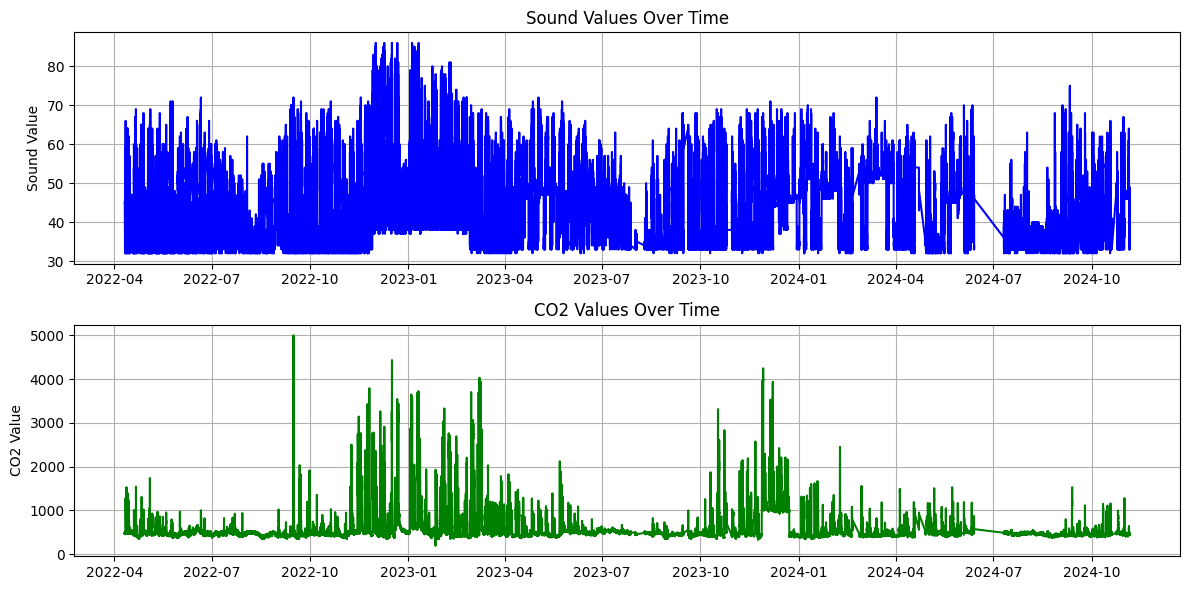

In [4]:

# Load the dataset
file_path = 'Cleaned_sound_db/inverted_cleaned_file.csv'
data = pd.read_csv(file_path)

# Convert 'time' column to datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Step 1: Plot sound_value and co2_value over time
plt.figure(figsize=(12, 6))

# Sound values over time
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['sound_value'], color='b', label='Sound Value')
plt.title('Sound Values Over Time')
plt.ylabel('Sound Value')
plt.grid(True)

# CO2 values over time
plt.subplot(2, 1, 2)
plt.plot(data['time'], data['co2_value'], color='g', label='CO2 Value')
plt.title('CO2 Values Over Time')
plt.ylabel('CO2 Value')
plt.grid(True)

plt.tight_layout()
plt.show()



### Using time series to plot graph with 2 y-axis 

This is a visualization technique where two y-axes are used to represent variables with different ranges on the same time-based x-axis. It's helpful for visual comparisons between two variables that don't share the same scale (like CO₂ and sound levels).

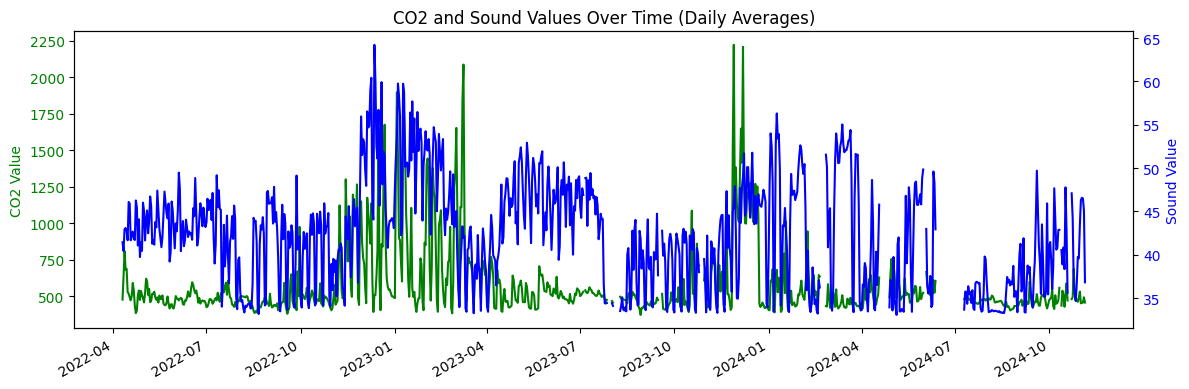

In [5]:


#Step 3
sensor_data = data

# Resample data to daily averages to smooth fluctuations for clearer trends
daily_data = sensor_data.set_index('time').resample('D').mean()

# Create figure and axis objects with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot CO2 data on the primary y-axis
ax1.plot(daily_data.index, daily_data['co2_value'], color='green', label='CO2 Value')
ax1.set_ylabel('CO2 Value', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create secondary y-axis for sound data
ax2 = ax1.twinx()
ax2.plot(daily_data.index, daily_data['sound_value'], color='blue', label='Sound Value')
ax2.set_ylabel('Sound Value', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Format x-axis for dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
fig.autofmt_xdate()

# Title and layout adjustments
plt.title('CO2 and Sound Values Over Time (Daily Averages)')
fig.tight_layout()

plt.show()


### Visualizing correlation matrix with original values

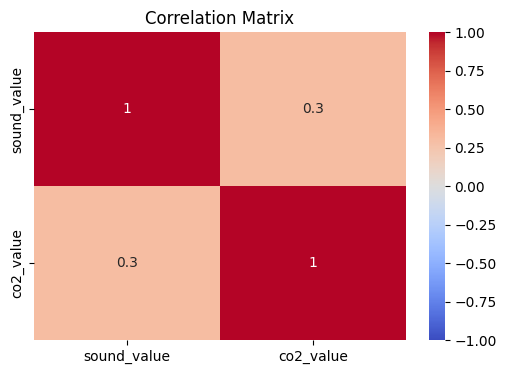

Correlation between sound_value and co2_value: 0.3003888379125694


In [6]:
# Step 4: Visualize correlation matrix using heatmap
plt.figure(figsize=(6, 4))
correlation_matrix = data[['sound_value', 'co2_value']].corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Step 5: Calculate the correlation between 'sound_value' and 'co2_value'
correlation = data['sound_value'].corr(data['co2_value'])
print(f"Correlation between sound_value and co2_value: {correlation}")

The correlation coefficient between sound_value and co2_value is approximately 0.302. Correlation coefficients range from -1 to 1, and here's how to interpret this specific value:

Magnitude (0.302):

1. The value is close to 0, indicating a weak positive correlation. This means that as sound_value increases, co2_value tends to increase slightly, but the relationship is not very strong. The increase in one variable doesn't lead to a very consistent or predictable increase in the other.
Direction (Positive):

2. Since the value is positive, the relationship between the two variables is in the same direction. In this case, higher sound levels tend to be associated with higher CO₂ levels, albeit weakly. Conversely, lower sound values are loosely related to lower CO₂ levels.

# Shifting Co2 values to see the best shift interval between 10, 20 and 30 mins

In [23]:
import pandas as pd

# Load data
df = pd.read_csv('Cleaned_sound_db/inverted_cleaned_file.csv')

# Define the maximum shift and the interval (10-minute increments)
max_shift_minutes = 60
interval = 10

# Loop through each interval and shift the data
for shift_minutes in range(interval, max_shift_minutes + 1, interval):
    shift_rows = shift_minutes // interval  # Calculate the number of rows to shift
    shifted_df = df.copy()
    shifted_df['co2_value'] = df['co2_value'].shift(-shift_rows)

    # Drop rows with NaN values generated from the shift
    shifted_df = shifted_df.dropna(subset=['co2_value']).reset_index(drop=True)

    # Save the shifted data to CSV
    output_filename = f'Cleaned_sound_db/shifted_co2_{shift_minutes}_min.csv'
    shifted_df.to_csv(output_filename, index=False)

    print(f"Shifted data for {shift_minutes} minutes saved to {output_filename}")


Shifted data for 10 minutes saved to Cleaned_sound_db/shifted_co2_10_min.csv
Shifted data for 20 minutes saved to Cleaned_sound_db/shifted_co2_20_min.csv
Shifted data for 30 minutes saved to Cleaned_sound_db/shifted_co2_30_min.csv
Shifted data for 40 minutes saved to Cleaned_sound_db/shifted_co2_40_min.csv
Shifted data for 50 minutes saved to Cleaned_sound_db/shifted_co2_50_min.csv
Shifted data for 60 minutes saved to Cleaned_sound_db/shifted_co2_60_min.csv


## Plotting graphs

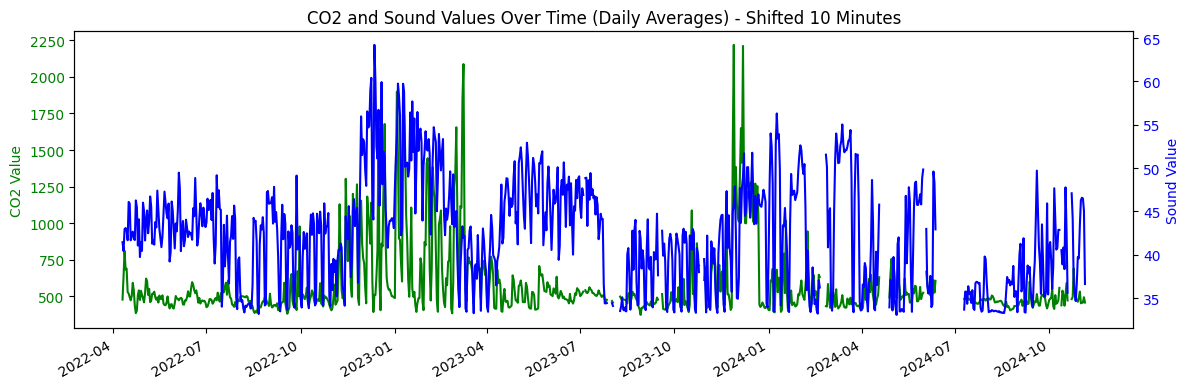

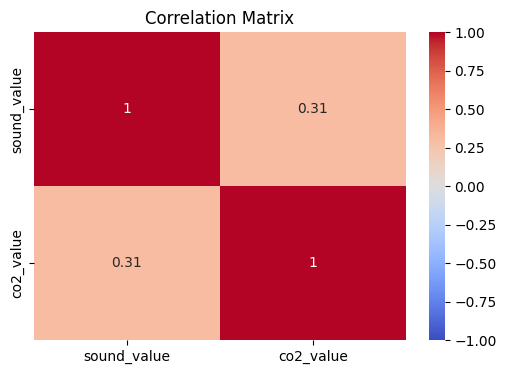

Correlation between sound_value and co2_value: 0.3081647325502553


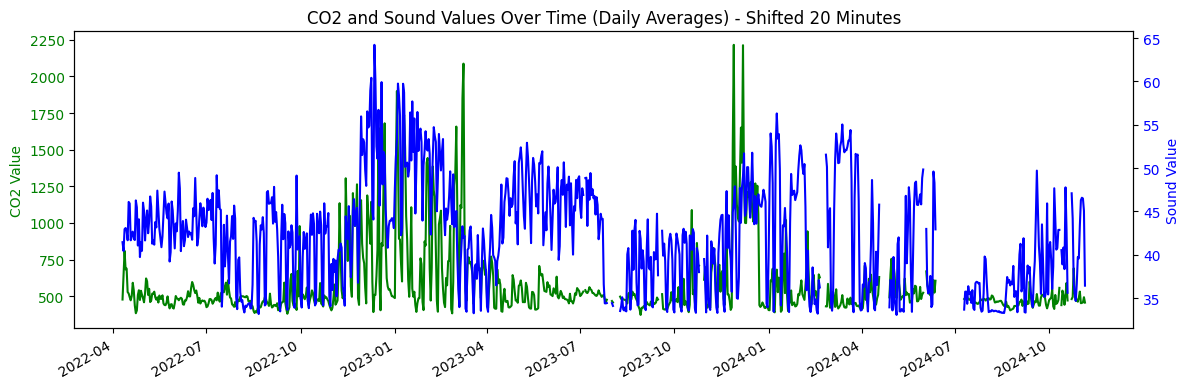

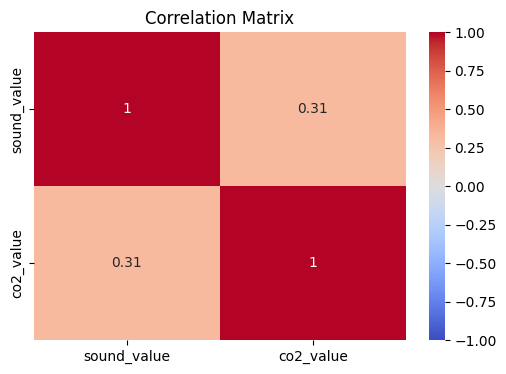

Correlation between sound_value and co2_value: 0.3137631108133793


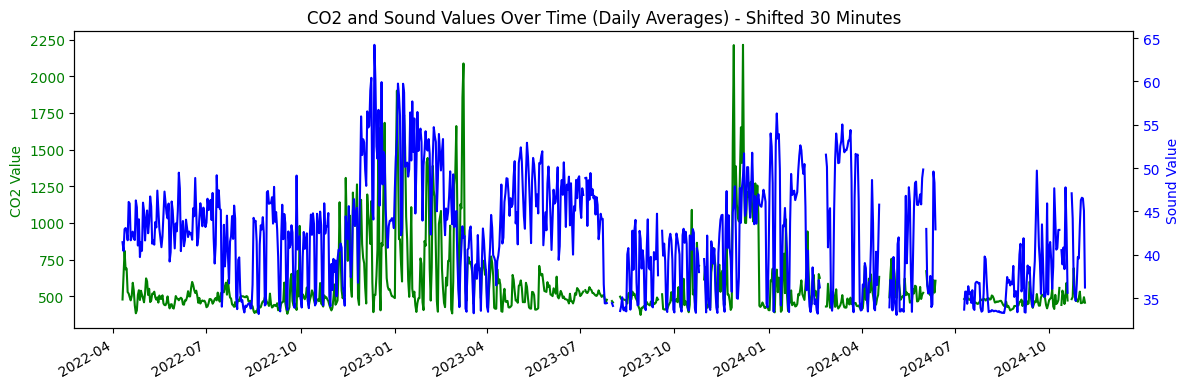

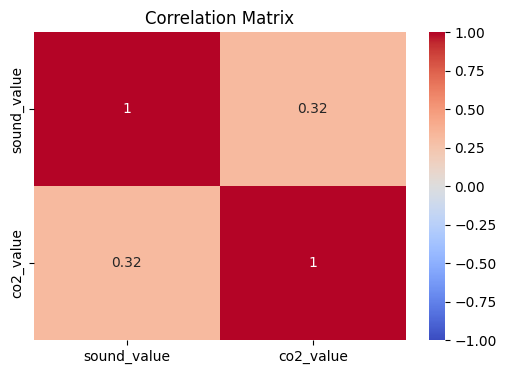

Correlation between sound_value and co2_value: 0.31805860772900846


In [9]:
# List of CSV files for shifted data
csv_files = ["shifted_co2_10_min.csv", "shifted_co2_20_min.csv", "shifted_co2_30_min.csv"]

for file in csv_files:
    # Load the dataset
    sensor_data = pd.read_csv("Cleaned_sound_db/"+file)
    
    # Ensure the 'time' column is in datetime format
    sensor_data['time'] = pd.to_datetime(sensor_data['time'])
    
    # Set the 'time' column as the index for resampling
    daily_data = sensor_data.set_index('time').resample('D').mean()

    # Create figure and axis objects with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 4))

    # Plot CO2 data on the primary y-axis
    ax1.plot(daily_data.index, daily_data['co2_value'], color='green', label='CO2 Value')
    ax1.set_ylabel('CO2 Value', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Create secondary y-axis for sound data
    ax2 = ax1.twinx()
    ax2.plot(daily_data.index, daily_data['sound_value'], color='blue', label='Sound Value')
    ax2.set_ylabel('Sound Value', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Format x-axis for dates
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    fig.autofmt_xdate()

    # Title and layout adjustments
    plt.title(f'CO2 and Sound Values Over Time (Daily Averages) - Shifted {file.split("_")[-2]} Minutes')
    fig.tight_layout()

    # Show the plot
    plt.show()

    plt.figure(figsize=(6, 4))
    correlation_matrix = sensor_data[['sound_value', 'co2_value']].corr()


    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

    correlation = sensor_data['sound_value'].corr(sensor_data['co2_value'])
    print(f"Correlation between sound_value and co2_value: {correlation}")


literature study with the volume of the room.

# ***Study on Co2 and No of people in a space***

## CO₂ Accumulation and Detection in a Room with Varying Occupancy

## Overview
This study examines the accumulation of CO₂ in a **30 m² room** with a **volume of 75 m³** when the number of people changes. It also calculates the time it would take for a CO₂ sensor to detect this change, assuming no ventilation.

### Key Assumptions:
- Room size: **30 m²** with a volume of **75 m³** (assuming a ceiling height of 2.5 m).
- CO₂ emission rate per person: **0.02 m³/hour** (20 liters/hour).
- CO₂ sensor detection sensitivity: **10-20 ppm**.
- Baseline CO₂ level: **400 ppm**.

## Step 1: CO₂ Production Rate
Calculate the CO₂ production rates for different numbers of occupants.

- For **3 people**:
  \[
  \text{CO₂ production} = 3 \times 0.02 \, \text{m}^3/\text{hour} = 0.06 \, \text{m}^3/\text{hour}
  \]

- For **5 people**:
  \[
  \text{CO₂ production} = 5 \times 0.02 \, \text{m}^3/\text{hour} = 0.1 \, \text{m}^3/\text{hour}
  \]

- Difference in CO₂ production (increase from 3 to 5 people):
  \[
  \Delta \text{CO₂} = 0.1 - 0.06 = 0.04 \, \text{m}^3/\text{hour}
  \]

## Step 2: Change in CO₂ Concentration
Calculate the increase in CO₂ concentration in the room due to the change in occupancy.

\[
\text{Change in ppm per hour} = \left(\frac{0.04 \, \text{m}^3}{75 \, \text{m}^3}\right) \times 1,000,000 = 533 \, \text{ppm/hour}
\]

## Step 3: Time to Detectable Change
Estimate the time required for a CO₂ sensor to detect the difference in the number of people based on its sensitivity.

- If the sensor sensitivity is **10 ppm**:
  \[
  \text{Time to detect change} = \frac{10 \, \text{ppm}}{533 \, \text{ppm/hour}} = 0.019 \, \text{hours} = 1.14 \, \text{minutes}
  \]

- If the sensor sensitivity is **20 ppm**:
  \[
  \text{Time to detect change} = \frac{20 \, \text{ppm}}{533 \, \text{ppm/hour}} = 0.038 \, \text{hours} = 2.28 \, \text{minutes}
  \]

## Conclusion
In a **30 m² room** with a volume of **75 m³**, if the number of occupants increases from **3 to 5**, the CO₂ concentration rises by **533 ppm per hour**. A typical CO₂ sensor with a detection sensitivity of **10-20 ppm** would be able to detect this change within **1-3 minutes**. 

Proper ventilation is recommended to maintain safe indoor air quality, as CO₂ levels can increase quickly with multiple occupants in an enclosed space.


# **Preparing Data for Correlation with No. of humans**

### Getting the data set required and time fixed format fixed like the nb of people data set for the ***original data*** set

In [36]:
df = pd.read_csv('Cleaned_sound_db\inverted_cleaned_file.csv', parse_dates=['time'])

df['time'] = df['time'].dt.round('10min')

# Filter the data between the specified dates
start_date = '2024-02-02'
end_date = '2024-02-21'

# Extract the relevant data
filtered_data = df[(df['time'] >= start_date) & (df['time'] <= end_date)]


# Optionally, save the filtered data to a new CSV file
filtered_data.to_csv('Cleaned_Nhuman_sound_db/0_shift_db_sound_in_range.csv', index=False)

filtered_data.head()


,time,sound_value,co2_value
88880,2024-02-02 00:00:00,51.0,466.0
88881,2024-02-02 00:10:00,50.0,469.0
88882,2024-02-02 00:20:00,52.0,463.0
88883,2024-02-02 00:30:00,51.0,486.0
88884,2024-02-02 00:40:00,51.0,480.0


### Getting the data set required and time fixed format fixed like the nb of people data set for the ***10,20 and 30 mins shift*** data sets

In [35]:

for i in range(10,61,10):
    df = pd.read_csv(f'Cleaned_sound_db\shifted_co2_{i}_min.csv', parse_dates=['time'])

    df['time'] = df['time'].dt.round('10min')

    # Filter the data between the specified dates
    start_date = '2024-02-02'
    end_date = '2024-02-21'

    # Extract the relevant data
    filtered_data = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

    # Optionally, save the filtered data to a new CSV file
    filtered_data.to_csv(f'Cleaned_Nhuman_sound_db/{i}_shift_db_sound_in_range.csv', index=False)


### Creating single file containing all the data: Nb People, sound and dB for Orginal, 10 mins, 20 mins and 30 mins co2 shift data sets.

In [37]:
import pandas as pd

df_people = pd.read_csv('Cleaned_Nhuman_sound_db\detections_filtered_with_timestamp.csv', parse_dates=['Timestamp'])
# Rename the timestamp columns for consistency
df_people.rename(columns={'Timestamp': 'time'}, inplace=True)

for i in range(0,61,10): 
    # Read the second file (sound and CO2 data)
    df_sensor = pd.read_csv(f'Cleaned_Nhuman_sound_db/{i}_shift_db_sound_in_range.csv', parse_dates=['time'])

    # Merge the DataFrames on the 'time' column using an inner join
    merged_df = pd.merge(df_people[['time', 'Num_people']], df_sensor[['time', 'sound_value', 'co2_value']], on='time', how='inner')

    # Save the merged data to a new CSV file
    merged_df.to_csv(f'Cleaned_Nhuman_sound_db/Final_{i}_shift_db_sound_in_range.csv', index=False)

    print(merged_df.head(3))


                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      562.0
1 2024-02-02 13:30:00           0         58.0      989.0
2 2024-02-02 14:00:00           6         62.0     1120.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      615.0
1 2024-02-02 13:30:00           0         58.0     1042.0
2 2024-02-02 14:00:00           6         62.0     1155.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      775.0
1 2024-02-02 13:30:00           0         58.0     1113.0
2 2024-02-02 14:00:00           6         62.0     1164.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      989.0
1 2024-02-02 13:30:00           0         58.0     1120.0
2 2024-02-02 14:00:00           6         62.0     1288.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 1

### Plotting for Analysis


---------Processing file with 0 mins shift---------

Correlation between Num_people and co2_value: 0.82
Correlation between Num_people and sound_value: 0.54
Correlation between sound_value and co2_value: 0.34


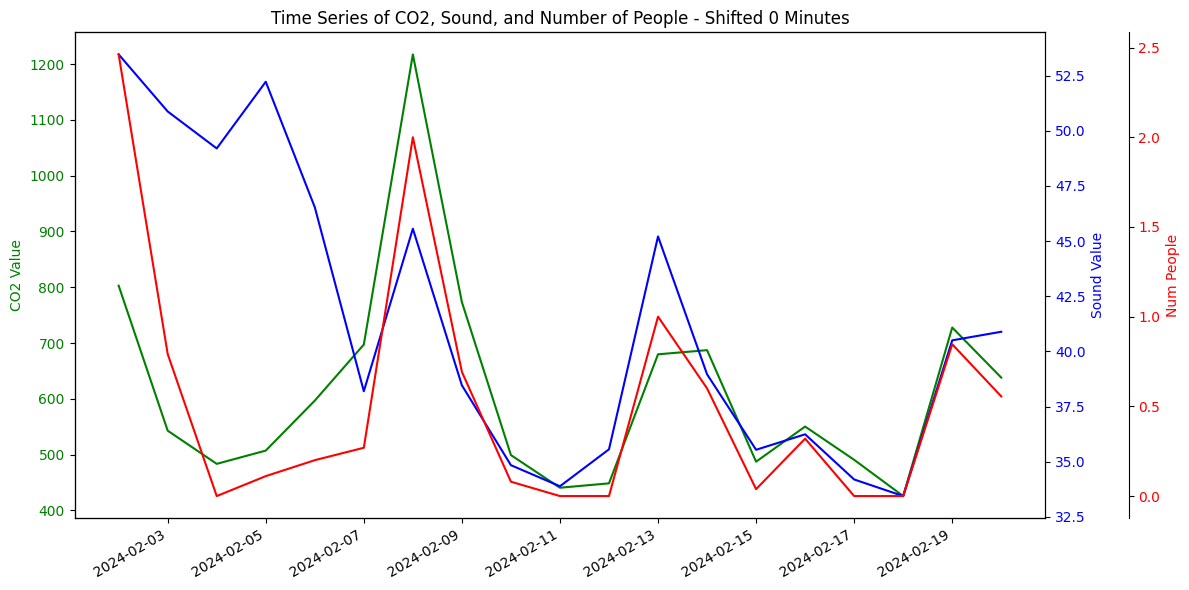

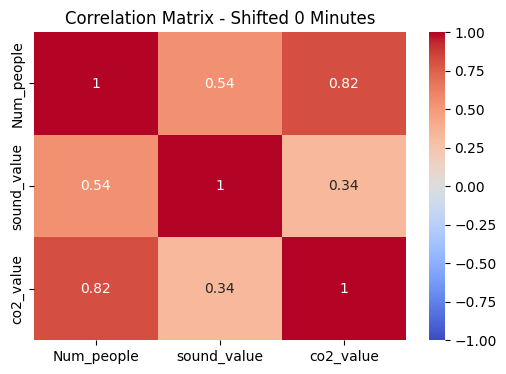


---------Processing file with 10 mins shift---------

Correlation between Num_people and co2_value: 0.82
Correlation between Num_people and sound_value: 0.54
Correlation between sound_value and co2_value: 0.33


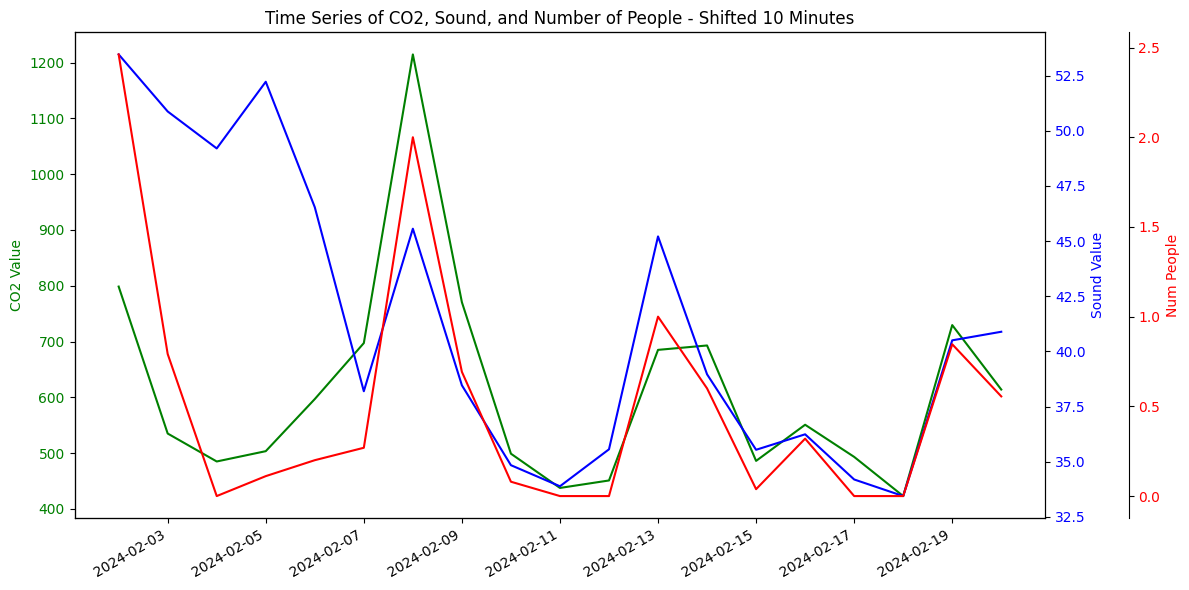

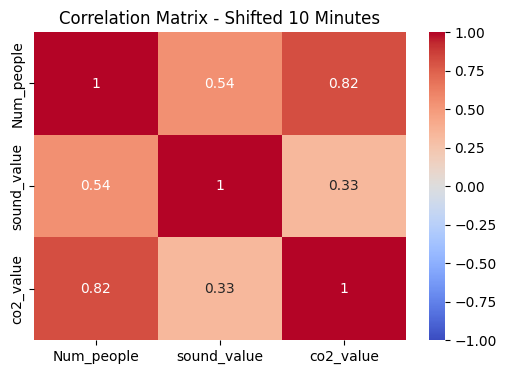


---------Processing file with 20 mins shift---------

Correlation between Num_people and co2_value: 0.81
Correlation between Num_people and sound_value: 0.54
Correlation between sound_value and co2_value: 0.32


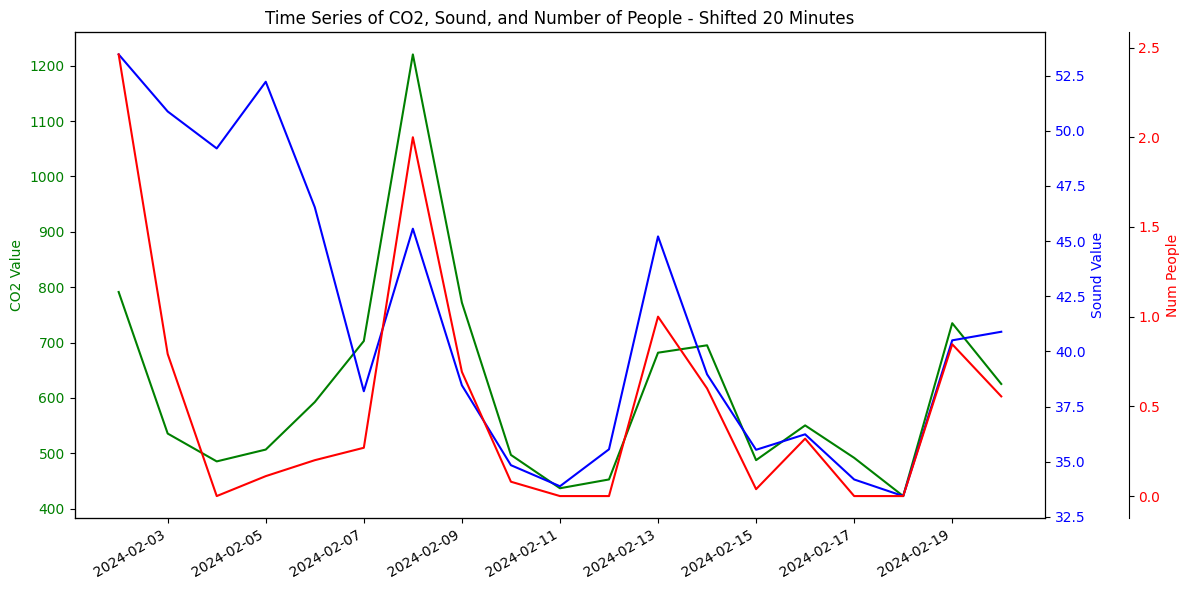

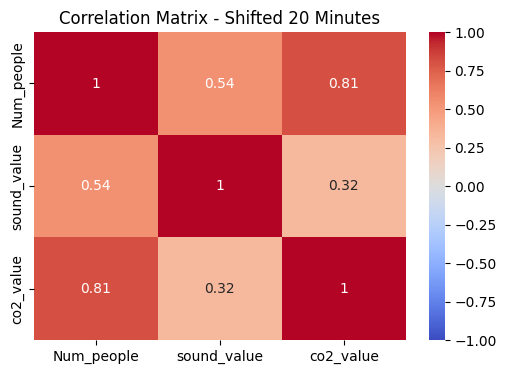


---------Processing file with 30 mins shift---------

Correlation between Num_people and co2_value: 0.81
Correlation between Num_people and sound_value: 0.54
Correlation between sound_value and co2_value: 0.33


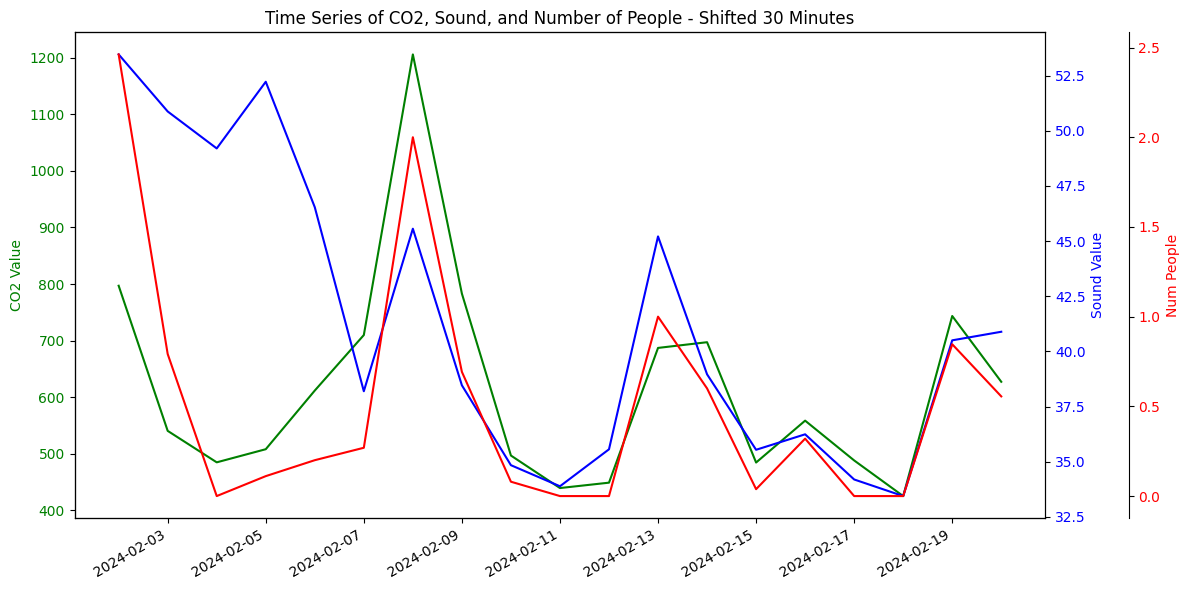

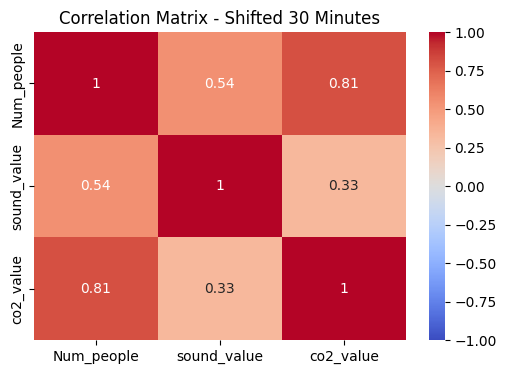


---------Processing file with 40 mins shift---------

Correlation between Num_people and co2_value: 0.81
Correlation between Num_people and sound_value: 0.54
Correlation between sound_value and co2_value: 0.32


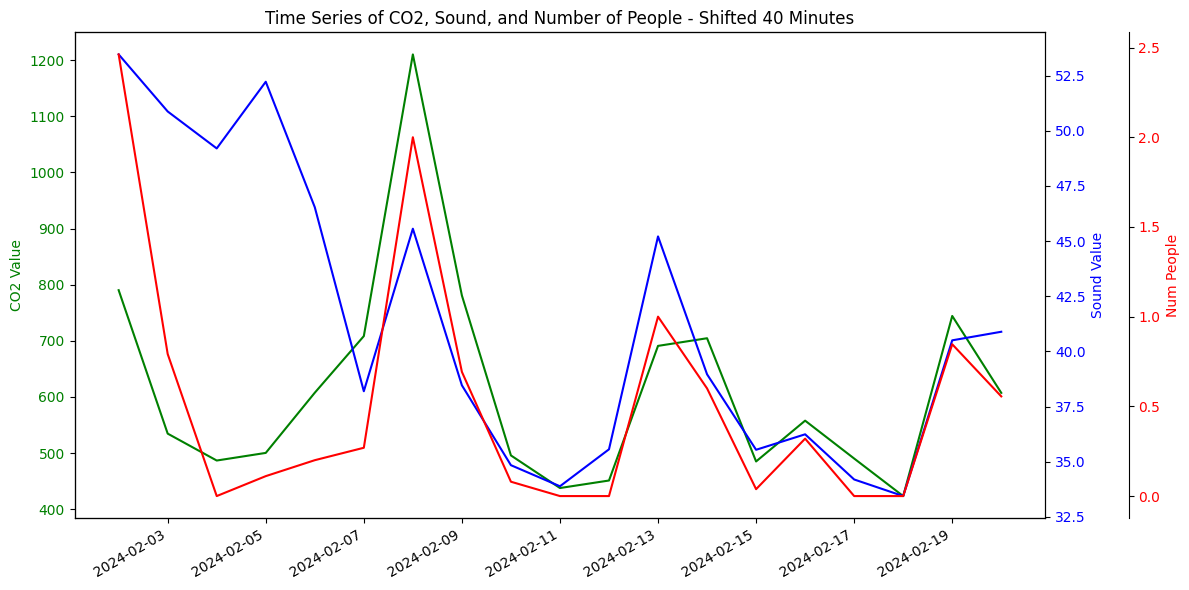

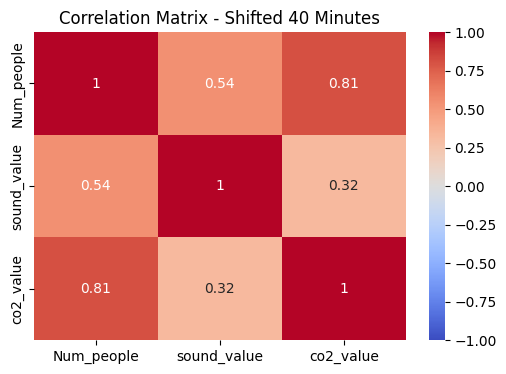


---------Processing file with 50 mins shift---------

Correlation between Num_people and co2_value: 0.79
Correlation between Num_people and sound_value: 0.54
Correlation between sound_value and co2_value: 0.31


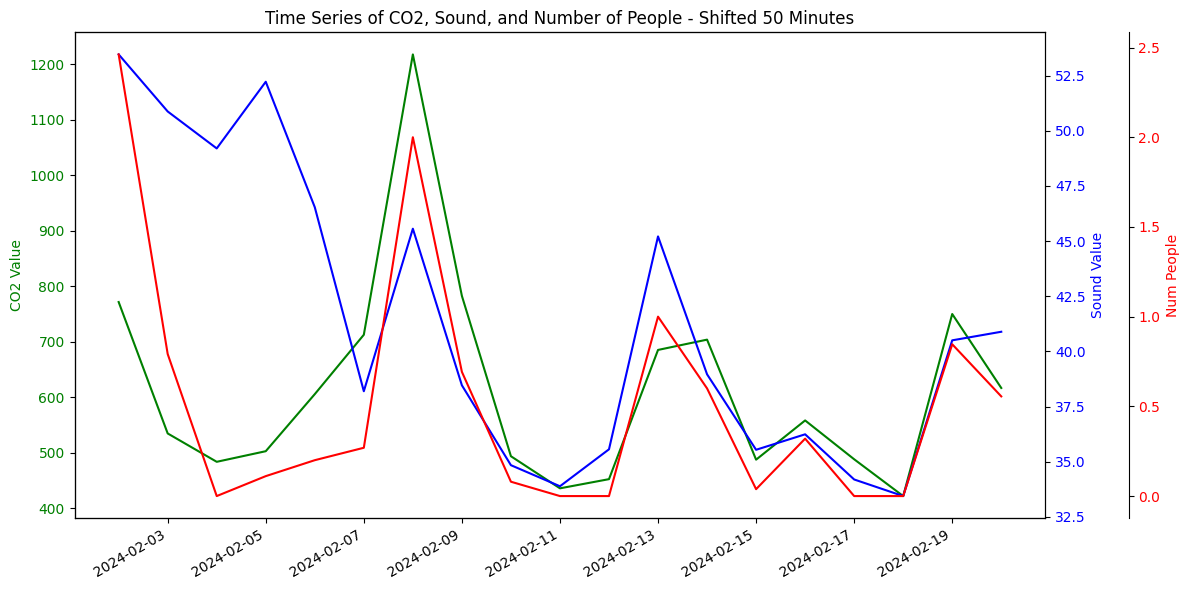

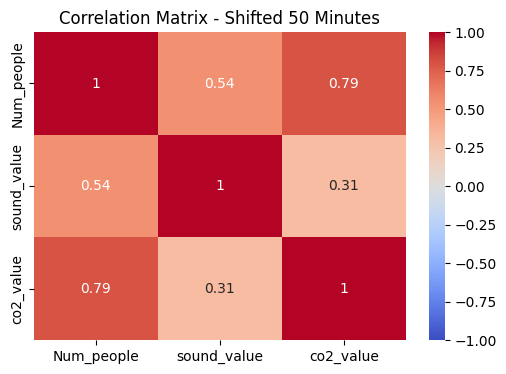


---------Processing file with 60 mins shift---------

Correlation between Num_people and co2_value: 0.78
Correlation between Num_people and sound_value: 0.54
Correlation between sound_value and co2_value: 0.31


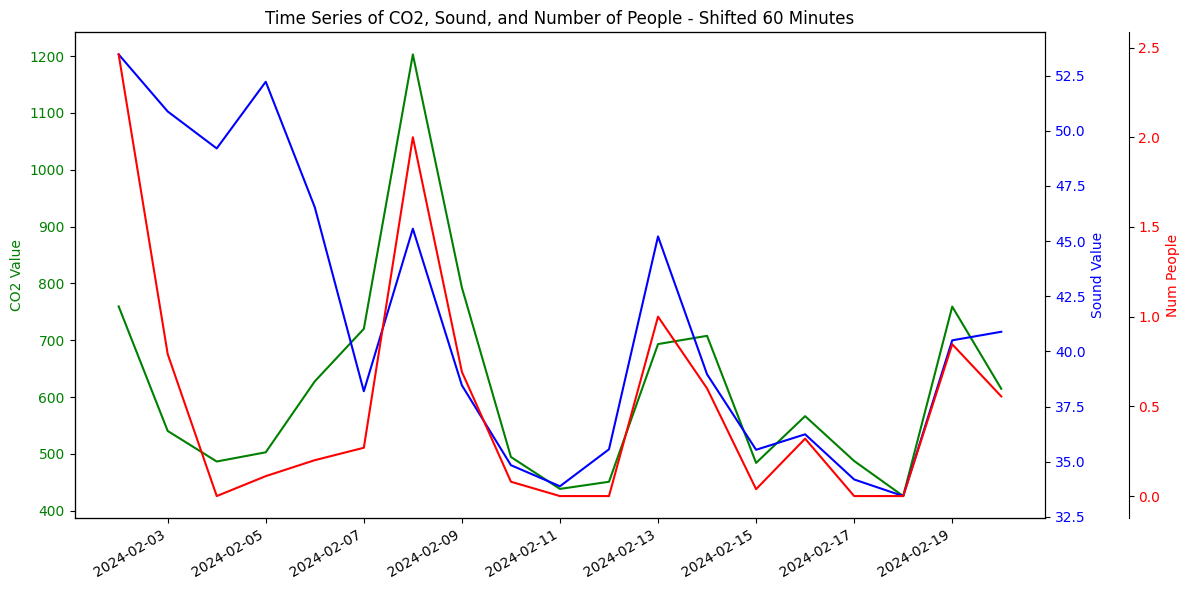

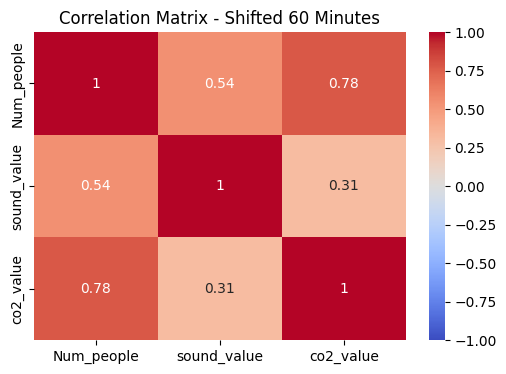

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.graph_objects as go


# Iterate over each file
for i in range(0,61,10): 

    print(f"\n---------Processing file with {i} mins shift---------\n")
    
    # Load the dataset
    sensor_data = pd.read_csv(f"Cleaned_Nhuman_sound_db/Final_{i}_shift_db_sound_in_range.csv")

    # Ensure the 'time' column is in datetime format
    sensor_data['time'] = pd.to_datetime(sensor_data['time'])

    # Set the 'time' column as the index for resampling (daily mean)
    daily_data = sensor_data.set_index('time').resample('D').mean()

    # Calculate correlations
    correlation_matrix = daily_data[['Num_people', 'sound_value', 'co2_value']].corr()
    correlation_people_co2 = daily_data['Num_people'].corr(daily_data['co2_value'])
    correlation_people_sound = daily_data['Num_people'].corr(daily_data['sound_value'])
    correlation_sound_co2 = daily_data['sound_value'].corr(daily_data['co2_value'])

    # Print correlation values
    print(f"Correlation between Num_people and co2_value: {correlation_people_co2:.2f}")
    print(f"Correlation between Num_people and sound_value: {correlation_people_sound:.2f}")
    print(f"Correlation between sound_value and co2_value: {correlation_sound_co2:.2f}")

    # Plot Time Series for Num_people, sound_value, and co2_value
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot CO2 on primary y-axis
    ax1.plot(daily_data.index, daily_data['co2_value'], color='green', label='CO2 Value')
    ax1.set_ylabel('CO2 Value', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Create secondary y-axis for sound_value
    ax2 = ax1.twinx()
    ax2.plot(daily_data.index, daily_data['sound_value'], color='blue', label='Sound Value')
    ax2.set_ylabel('Sound Value', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis for Num_people
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(daily_data.index, daily_data['Num_people'], color='red', label='Num People')
    ax3.set_ylabel('Num People', color='red')
    ax3.tick_params(axis='y', labelcolor='red')

    # Formatting the x-axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    fig.autofmt_xdate()

    # Title and layout
    plt.title(f'Time Series of CO2, Sound, and Number of People - Shifted {i} Minutes')
    fig.tight_layout()

    # Show the plot
    plt.show()

    # Heatmap of the correlation matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix - Shifted {i} Minutes')
    plt.show()

